In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Sample - Superstore.csv")


In [3]:
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.columns


Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
inventory_df = (
    df.groupby("Sub-Category")
      .agg(
          total_quantity_sold=("Quantity", "sum"),
          total_profit=("Profit", "sum")
      )
      .reset_index()
)


In [8]:
inventory_df["inventory_days_proxy"] = 1 / inventory_df["total_quantity_sold"]


In [9]:
inventory_df[["inventory_days_proxy", "total_profit"]].corr()


,inventory_days_proxy,total_profit
inventory_days_proxy,1.000000,0.135039
total_profit,0.135039,1.000000


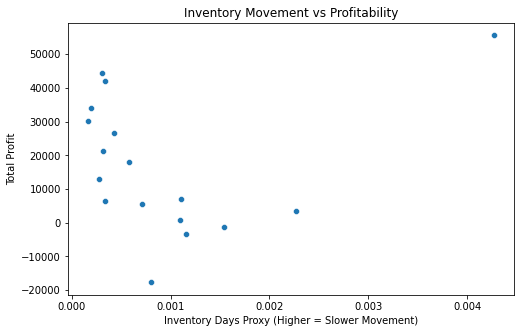

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=inventory_df,
    x="inventory_days_proxy",
    y="total_profit"
)
plt.title("Inventory Movement vs Profitability")
plt.xlabel("Inventory Days Proxy (Higher = Slower Movement)")
plt.ylabel("Total Profit")
plt.show()


“Since direct inventory data was unavailable, inventory turnover was approximated using total quantity sold per sub-category. Lower quantity sold indicates slow-moving inventory, which was correlated with profitability to identify overstock and loss-making products.”